Question 1: What is Boosting in Machine Learning? Explain how it improves weak
learners

Ans

**Boosting** is an ensemble learning technique in machine learning where multiple weak learners are combined to form a strong learner. A weak learner is a model that performs slightly better than random guessing, such as a shallow decision tree (decision stump).

Boosting works by training models sequentially. In each step, the algorithm focuses more on the data points that were misclassified by the previous model. It assigns higher importance (weights) to those difficult examples so that the next model tries harder to correct them. After training several weak learners, their predictions are combined (usually using weighted voting or weighted averaging) to produce the final result.

By repeatedly correcting mistakes and giving more attention to hard cases, boosting reduces bias and improves overall accuracy. As a result, many simple models together can perform much better than a single weak model.


Question 2: What is the difference between AdaBoost and Gradient Boosting in terms
of how models are trained?


Ans

**AdaBoost** and **Gradient Boosting** are both boosting algorithms, but they differ in how they train models and correct errors.

In **AdaBoost**, models are trained sequentially, and after each model is trained, the algorithm increases the weights of the misclassified data points. This means the next model focuses more on the mistakes made by the previous one. Each weak learner is given a weight based on its accuracy, and the final prediction is made using weighted voting (for classification) or weighted averaging (for regression).

In **Gradient Boosting**, models are also trained sequentially, but instead of changing data weights directly, each new model is trained to predict the residual errors (the difference between actual and predicted values) of the previous model. It uses gradient descent to minimize a loss function step by step.

In simple terms, AdaBoost focuses on adjusting the weights of misclassified data points, while Gradient Boosting focuses on minimizing a loss function by learning from previous errors.


Question 3: How does regularization help in XGBoost?


Ans

**Regularization in XGBoost** helps prevent overfitting and makes the model more generalizable to new data.

XGBoost includes regularization directly in its objective function. It adds a penalty term that controls the complexity of the model. This penalty discourages the model from creating overly complex trees that fit the training data too closely.

There are two main types of regularization in XGBoost:

* **L1 regularization (alpha)**: Encourages sparsity by reducing some feature weights to zero. This helps in feature selection.
* **L2 regularization (lambda)**: Penalizes large weights and keeps the model more stable.

In addition, XGBoost also controls complexity using parameters like:

* `max_depth` (limits tree depth)
* `min_child_weight`
* `subsample` (uses random subset of data)
* `colsample_bytree` (uses subset of features)

By controlling model complexity, regularization reduces variance, prevents overfitting, and improves performance on unseen data. In simple terms, regularization helps XGBoost build a strong but not overly complex model.


Question 4: Why is CatBoost considered efficient for handling categorical data?

Ans

**CatBoost** is considered efficient for handling categorical data because it can process categorical features directly without requiring manual encoding like One-Hot Encoding or Label Encoding.

Traditional machine learning models require categorical data to be converted into numerical form before training. This can increase dimensionality and sometimes reduce model performance. However, CatBoost uses a special technique called **ordered target encoding**, which converts categorical variables into numerical values in a smart and unbiased way.

CatBoost also:

* Handles high-cardinality categorical features efficiently.
* Reduces overfitting caused by improper encoding.
* Automatically detects which features are categorical.
* Uses an ordered boosting technique to prevent data leakage.

Because of these built-in mechanisms, CatBoost simplifies preprocessing, improves performance, and is especially powerful for datasets with many categorical features, such as financial or customer data.


Question 5: What are some real-world applications where boosting techniques are
preferred over bagging methods?

Ans

Boosting techniques are preferred over bagging methods in real-world applications where **high prediction accuracy** is more important than just reducing variance, and where the data has complex patterns.

Some common real-world applications include:

1. Loan Default Prediction
   In banking and finance, boosting methods like XGBoost or LightGBM are often used to predict whether a customer will default on a loan. These problems are complex and require models that can capture subtle patterns in customer behavior.

2. Fraud Detection
   Boosting works well in fraud detection because it focuses on correcting previous mistakes and pays attention to difficult or rare cases, which is important in detecting fraudulent transactions.

3. Medical Diagnosis
   In healthcare, boosting is used for disease prediction or risk assessment because it provides high accuracy and handles complex relationships between features.

4. Recommendation Systems
   Boosting can improve prediction accuracy for ranking and recommendation tasks by learning from errors step by step.

5. Competition-Level Machine Learning
   In platforms like Kaggle competitions, boosting algorithms (especially XGBoost, LightGBM, and CatBoost) are often preferred because they consistently deliver high performance.

In simple terms, boosting is preferred over bagging when the goal is to achieve the best possible accuracy on complex problems, especially in high-stakes domains like finance, healthcare, and fraud detection.


Question 6: Write a Python program to:
● Train an AdaBoost Classifier on the Breast Cancer dataset
● Print the model accurac

In [1]:
# Import required libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Load Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Create AdaBoost Classifier
model = AdaBoostClassifier(
    n_estimators=100,
    learning_rate=1.0,
    random_state=42
)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print results
print("AdaBoost Classifier Accuracy:", accuracy)

AdaBoost Classifier Accuracy: 0.9707602339181286


Question 7: Write a Python program to:
● Train a Gradient Boosting Regressor on the California Housing dataset
● Evaluate performance using R-squared scor

In [2]:
# Import required libraries
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Load California Housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Create Gradient Boosting Regressor
model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance using R-squared score
r2 = r2_score(y_test, y_pred)

# Print result
print("R-squared Score:", r2)

R-squared Score: 0.7803012822391022


Question 8: Write a Python program to:
● Train an XGBoost Classifier on the Breast Cancer dataset
● Tune the learning rate using GridSearchCV
● Print the best parameters and accuracy


In [6]:
# Install xgboost if not installed
# pip install xgboost

# Import required libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Load Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Create XGBoost classifier
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Define parameter grid (tuning learning rate)
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]
}

# Apply GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy'
)

# Train model using grid search
grid_search.fit(X_train, y_train)

# Get best model
best_model = grid_search.best_estimator_

# Predict on test data
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print results
print("Best Parameters:", grid_search.best_params_)
print("Model Accuracy:", accuracy)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:200: UserWarning: [21:17:12] WARNING: /__w/xgboost/xgboost/src/learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:200: UserWarning: [21:17:14] WARNING: /__w/xgboost/xgboost/src/learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:200: UserWarning: [21:17:17] WARNING: /__w/xgboost/xgboost/src/learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:200: UserWarning: [21:17:19] WARNING: /__w/xgboost/xgboost/src/learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:

Best Parameters: {'learning_rate': 0.3}
Model Accuracy: 0.9649122807017544


Question 9: Write a Python program to:
● Train a CatBoost Classifier
● Plot the confusion matrix using seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.1/97.1 MB 9.1 MB/s eta 0:00:00
Model Accuracy: 0.9707602339181286


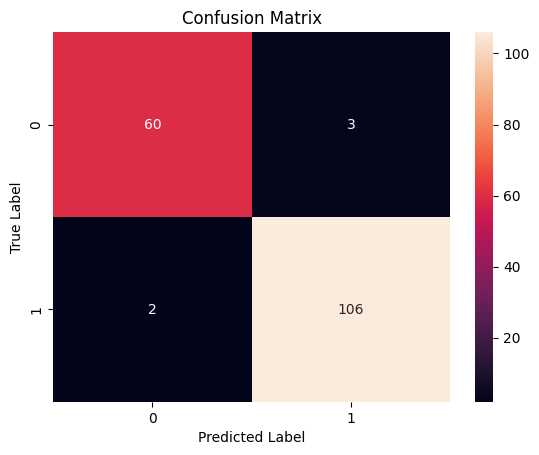

In [5]:
# Install catboost if not installed
!pip install catboost

# Import required libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from catboost import CatBoostClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Load Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train CatBoost Classifier
model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=6,
    verbose=0,
    random_state=42
)

model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

# Generate Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix using seaborn
plt.figure()
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Question 10: You're working for a FinTech company trying to predict loan default using
customer demographics and transaction behavior.
The dataset is imbalanced, contains missing values, and has both numeric and
categorical features.
Describe your step-by-step data science pipeline using boosting techniques:
● Data preprocessing & handling missing/categorical values
● Choice between AdaBoost, XGBoost, or CatBoost
● Hyperparameter tuning strategy
● Evaluation metrics you'd choose and why
● How the business would benefit from your model


Ans

If I am working in a FinTech company to predict loan default, I would follow a structured pipeline using boosting techniques to handle the imbalanced and mixed-type dataset.

Step 1: Data Preprocessing

1. Handle Missing Values

* For numerical features (income, transaction amount), I would use median imputation.
* For categorical features (employment type, marital status), I would use mode imputation or a separate “Missing” category.
* If missingness is meaningful, I may create an indicator feature.

2. Handle Categorical Variables

* If using XGBoost or AdaBoost, I would apply One-Hot Encoding or Target Encoding.
* If using CatBoost, I would directly pass categorical features, since CatBoost handles them internally and efficiently.

3. Handle Imbalanced Data
   Loan default datasets are usually imbalanced (few defaulters).
   I would:

* Use class weights (scale_pos_weight in XGBoost).
* Try SMOTE or oversampling if needed.
* Focus on evaluation metrics beyond accuracy.

4. Feature Engineering

* Create transaction behavior features (average monthly spend, repayment ratio, credit utilization rate).
* Normalize or scale features if required (though tree-based models usually do not require scaling).

Step 2: Choice Between AdaBoost, XGBoost, and CatBoost

* AdaBoost: Simple and useful for smaller datasets, but less powerful for complex financial data.
* XGBoost: Highly powerful, handles missing values internally, supports regularization, and performs well in structured tabular data.
* CatBoost: Best when there are many categorical variables, as it handles them automatically and reduces data leakage.

For loan default prediction with many categorical financial features, I would prefer CatBoost or XGBoost.

Step 3: Hyperparameter Tuning Strategy

I would use:

* GridSearchCV or RandomizedSearchCV for structured tuning.
* Cross-validation (k-fold) to ensure stability.

Important hyperparameters to tune:

* learning_rate
* n_estimators
* max_depth
* subsample
* colsample_bytree
* regularization parameters

I may also use early stopping to prevent overfitting.

Step 4: Evaluation Metrics

Since the dataset is imbalanced, accuracy alone is not sufficient.

I would focus on:

* Precision: To reduce false positives (approving risky customers).
* Recall: To reduce false negatives (missing actual defaulters).
* F1-score: Balance between precision and recall.
* ROC-AUC: Measures overall classification performance.
* Confusion Matrix: To understand type of errors.

In finance, recall for defaulters is very important because missing a defaulter can cause financial loss.

Step 5: Business Benefits

This model would provide:

* Better risk assessment before loan approval.
* Reduced financial losses from loan defaults.
* Improved credit decision automation.
* Data-driven customer risk scoring.
* Competitive advantage through smarter lending.

In real-world finance, boosting models improve prediction accuracy, reduce risk exposure, and help the company make safer and more profitable lending decisions.
